En este cuaderno se reescribe el código propuesto para clasificación de cáncer de seno usando subclassing de Keras

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

Cargando el conjunto de datos

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

ruta='gdrive/My Drive/Maestría/Inteligencia Artificial/'

Mounted at /content/gdrive


In [3]:
data = pd.read_csv(ruta+"Cancer_data.csv")
del data['Unnamed: 32']

In [4]:
x = data.iloc[:,2:].values
y = data.iloc[:,1].values

In [5]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 12)

In [7]:
x_test.shape

(57, 30)

In [8]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
class Block(layers.Layer):
  def __init__(self, out_channels,activation):
    super(Block, self).__init__()
    self.dens = layers.Dense(out_channels,activation,input_shape=(30,))
    self.drop = layers.Dropout(0.1)
    

  def call(self, input_tensor):
    x = self.dens(input_tensor)
    x = tf.nn.relu(x)
    return x

In [10]:
classifier = tf.keras.Sequential(
    [
     Block(16,"relu"),
     Block(16,"relu"),
     layers.Dense(1,activation='sigmoid')
    ]
)


In [11]:
classifier.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ["accuracy"]
)

In [12]:
history = classifier.fit(x_train, y_train, batch_size=32, epochs=100,validation_split = 0.2)

Epoch 1/100
13/13 [==============================] - 2s 29ms/step - loss: 0.6095 - accuracy: 0.6650 - val_loss: 0.5185 - val_accuracy: 0.7961
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4765 - accuracy: 0.8264 - val_loss: 0.4081 - val_accuracy: 0.8835
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.3831 - accuracy: 0.8875 - val_loss: 0.3285 - val_accuracy: 0.9126
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 0.3114 - accuracy: 0.9291 - val_loss: 0.2701 - val_accuracy: 0.9320
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2582 - accuracy: 0.9487 - val_loss: 0.2270 - val_accuracy: 0.9320
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 0.2157 - accuracy: 0.9511 - val_loss: 0.1952 - val_accuracy: 0.9515
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1840 - accuracy: 0.9584 - val_loss: 0.1721 - val_accuracy: 0.9515
Epoch 8/100

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

In [14]:
cm = confusion_matrix(y_test, y_pred)

In [15]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 98.24561403508771%


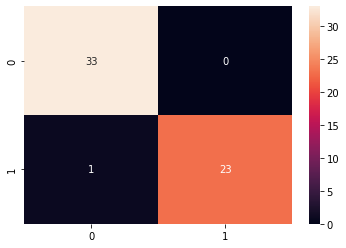

In [16]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [17]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

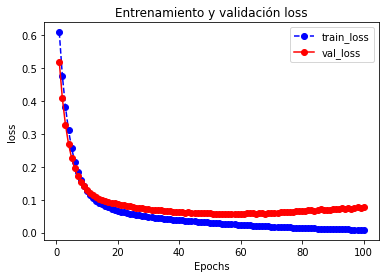

In [18]:
plot_metric(history, 'loss')

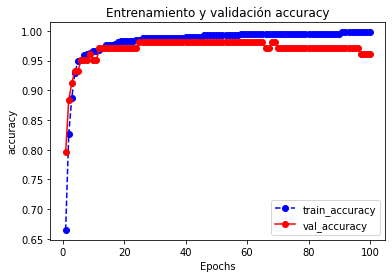

In [19]:
plot_metric(history, 'accuracy')